# Windowing SU data

The `wind` method of the `SUdata()` class takes arguments which allow to wind both in time and space and to modify automatically the header metadata.

## Windowing in time

In [1]:
# Import matplotlib
import matplotlib.pyplot as plt

# Import the SUdata class from nessi.io module
from nessi.io import SUdata

# Declare
dobs = SUdata()

# Read the SU file
dobs.read('data/musc_F50_01.su')

# Windowing in time between t=0s and t=0.25s
# The window method takes into account the 'delrt' SU header keyword
dobswt = dobs.wind(tmin=0., tmax=0.25)

# Show some SU header keywords
print('ns: ', dobs.header[0]['ns'], ' ', dobswt.header[0]['ns'], '\n')
print('dt: ', dobs.header[0]['dt']/1000000., ' ', dobswt.header[0]['dt']/1000000., '\n')
print('delrt: ', dobs.header[0]['delrt']/1000., ' ', dobswt.header[0]['delrt']/1000., '\n')

ns:  12000   2502 

dt:  0.0001   0.0001 

delrt:  -0.3   0.0 



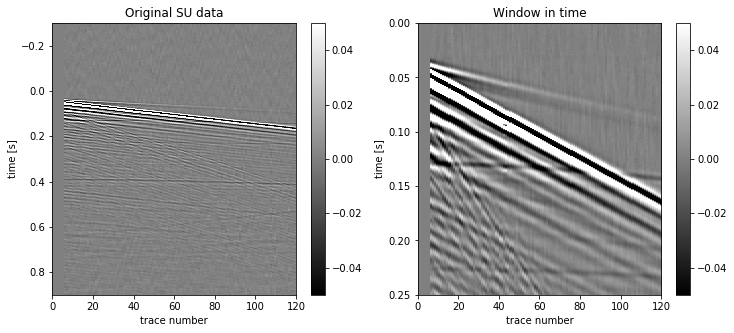

In [2]:
# Plot original and windowed data
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
dobs.image(clip=0.05, label2='trace number', label1='time [s]', title='Original SU data', legend=1)
plt.subplot(122)
dobswt.image(clip=0.05, label2='trace number', label1='time [s]', title='Window in time', legend=1)
plt.show()

## Window in space

Using the same function with other arguments, it is possible to apply a window in space to the SU data.

In [3]:
# Windowing in space between trace 20 and trace 80
dobsws = dobs.wind(key='tracl', min=20, max=80)

# Show some SU header keywords
print('ntrac ', len(dobs.header), ' ', len(dobsws.header), '\n')
print('ns: ', dobs.header[0]['ns'], ' ', dobsws.header[0]['ns'], '\n')
print('dt: ', dobs.header[0]['dt']/1000000., ' ', dobsws.header[0]['dt']/1000000., '\n')
print('delrt: ', dobs.header[0]['delrt']/1000., ' ', dobsws.header[0]['delrt']/1000., '\n')

ntrac  120   61 

ns:  12000   12000 

dt:  0.0001   0.0001 

delrt:  -0.3   -0.3 



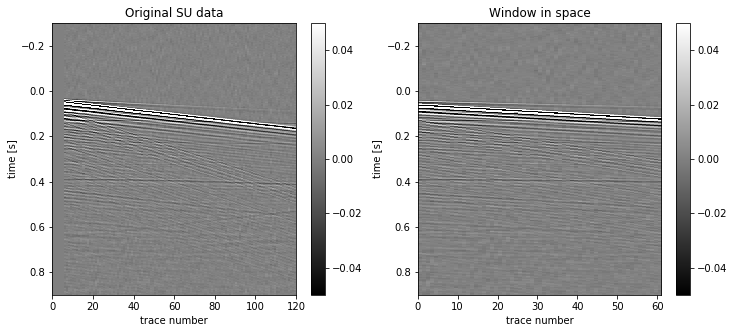

In [4]:
# Plot original and windowed data
fig2 = plt.figure(figsize=(12,5))
plt.subplot(121)
dobs.image(clip=0.05, label2='trace number', label1='time [s]', title='Original SU data', legend=1)
plt.subplot(122)
dobsws.image(clip=0.05, label2='trace number', label1='time [s]', title='Window in space', legend=1)
plt.show()

## Windowing in time and space

The windowing method allows to window in time and space at the same time.

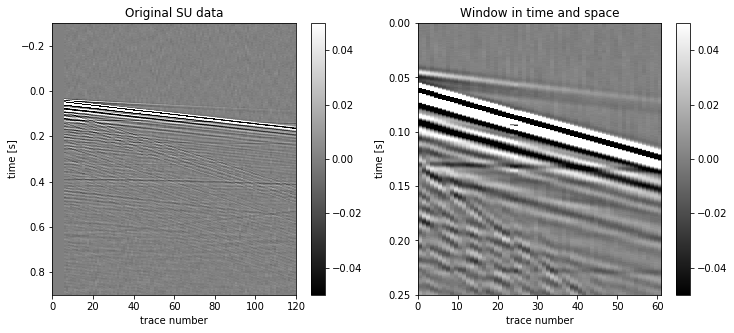

In [5]:
# Windowing in space between trace 20 and trace 80
dobswts = dobs.wind(tmin=0., tmax=0.25, key='tracl', min=20, max=80)

# Plot original and windowed data
fig2 = plt.figure(figsize=(12,5))
plt.subplot(121)
dobs.image(clip=0.05, label2='trace number', label1='time [s]', title='Original SU data', legend=1)
plt.subplot(122)
dobswts.image(clip=0.05, label2='trace number', label1='time [s]', title='Window in time and space', legend=1)
plt.show()